In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, Dropout, MaxPool1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
# Setting the parameter to plot at 30x15 size
plt.rcParams['figure.figsize'] = 21, 13

In [3]:
root_folder_train = r'C:\Users\hp\Desktop\rwork\train'
root_folder_test = r'C:\Users\hp\Desktop\rwork\test'
category = ['Normal', 'Abnormal']
destination = r'C:\Users\hp\Desktop\New folder1'

In [4]:
# Function to load the dataset and do the required formatting to be able to feed the data into the Keras Model
def load_data(root_folder):
    # These are delcarations of variables that have been used inside the for loop
    final_list = list()
    labels = list()
    # It is iterating through both the categories Normal and Abnormal
    for cat in category:
        # It is taking and processing each file in the folder
        #for filename in os.listdir(root_folder+cat):
        for filename in os.listdir(os.path.join(root_folder, cat)):
            
            # Read each file for each category and drop the unnecessary columns
            path = os.path.join(root_folder, cat, filename)
            #path = root_folder + cat + '\\' + filename
            df = pd.read_csv(path) # Read the CSV using inbuilt Pandas Function
            df.drop(index=0, axis=0, inplace=True) # Drop the first row, which contains the units of measurement (useless for our use case)
            df=df.iloc[:7680]
            df.columns = ["time", "ECG0", "ECG1"] # Rename the columns for convinience and easy access of the columns
            df.drop(['time'], axis=1, inplace=True) # Drop the time column, as we are not using it as a time series. We are using the indexes instead
            df.ECG0 = pd.to_numeric(df.ECG0) # The data by default is in the form of an object, Convert each row into numeric or floating point
            df.ECG1 = pd.to_numeric(df.ECG1)
            
            print(filename, len(df))
            
            # Split each file into 6 parts and then make each of them a new row by transposing
            df_split = np.array_split(df, 30) # Split the dataset into 30 different sets. This is not mandatory, but is suggested since the dataset size is less
            for splitted_array in df_split:
                final_list.append(np.array(splitted_array)) # After splitting, we are appending all the splitted arrays into 1 single large array of 3 dimentions
                # The following if-else block is used to create labels. We have taken '1' for AF ECG and '0' for Normal ECG
                # This is not the ideal way to create labels, but this is the most simplest way for this situation
                if cat == 'Normal':
                    labels.append(0)
                if cat == 'Abnormal':
                    labels.append(1)

    # Before returning, convert the lists to arrays and increase the dmentions for being able to feed into the Neural Network
    return np.array(final_list), np.expand_dims(np.array(labels), axis=1)

In [5]:
# Load the training and testing dataset separately by calling the function for each of their root folder locations
X_train, y_train = load_data(root_folder_train)
X_test, y_test = load_data(root_folder_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

samples (10).csv 7680
samples (11).csv 7680
samples (12).csv 7680
samples (13).csv 7680
samples (14).csv 7680
samples (15).csv 7680
samples (5).csv 7680
samples (7).csv 7680
samples (8).csv 7680
samples (9).csv 7680
samples (10).csv 7680
samples (11).csv 7680
samples (12).csv 7680
samples (13).csv 7680
samples (14).csv 7680
samples (4).csv 7680
samples (5).csv 7680
samples (6).csv 7680
samples (7).csv 7680
samples (8).csv 7680
samples (9).csv 7680
samples (1).csv 7680
samples (2).csv 7680
samples (3).csv 7680
samples (4).csv 7680
samples (1).csv 7680
samples (2).csv 7680
samples (3).csv 7680
samples.csv 7680
(630, 256, 2) (630, 1)
(240, 256, 2) (240, 1)


In [6]:
# Just printing out the dimentions to verify the data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(630, 256, 2) (630, 1)
(240, 256, 2) (240, 1)


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Define the RNN model with more layers
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')  # num_classes is the number of output classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=18, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/18
10/10 [==============================] - 21s 1s/step - loss: 0.6801 - accuracy: 0.5508 - val_loss: 0.6712 - val_accuracy: 0.5958
Epoch 2/18
10/10 [==============================] - 10s 1s/step - loss: 0.6128 - accuracy: 0.5952 - val_loss: 0.7347 - val_accuracy: 0.6167
Epoch 3/18
10/10 [==============================] - 10s 999ms/step - loss: 0.5699 - accuracy: 0.6873 - val_loss: 0.5642 - val_accuracy: 0.7417
Epoch 4/18
10/10 [==============================] - 15s 2s/step - loss: 0.5683 - accuracy: 0.7571 - val_loss: 0.3905 - val_accuracy: 0.8542
Epoch 5/18
10/10 [==============================] - 15s 2s/step - loss: 0.5140 - accuracy: 0.7873 - val_loss: 0.5187 - val_accuracy: 0.7583
Epoch 6/18
10/10 [==============================] - 11s 1s/step - loss: 0.4560 - accuracy: 0.8190 - val_loss: 0.5192 - val_accuracy: 0.7708
Epoch 7/18
10/10 [==============================] - 10s 1s/step - loss: 0.5760 - accuracy: 0.7302 - val_loss: 0.7377 - val_accuracy: 0.5958
Epoch 8/18
10/10 

Text(0.5, 1.0, 'Accuracy Curves')

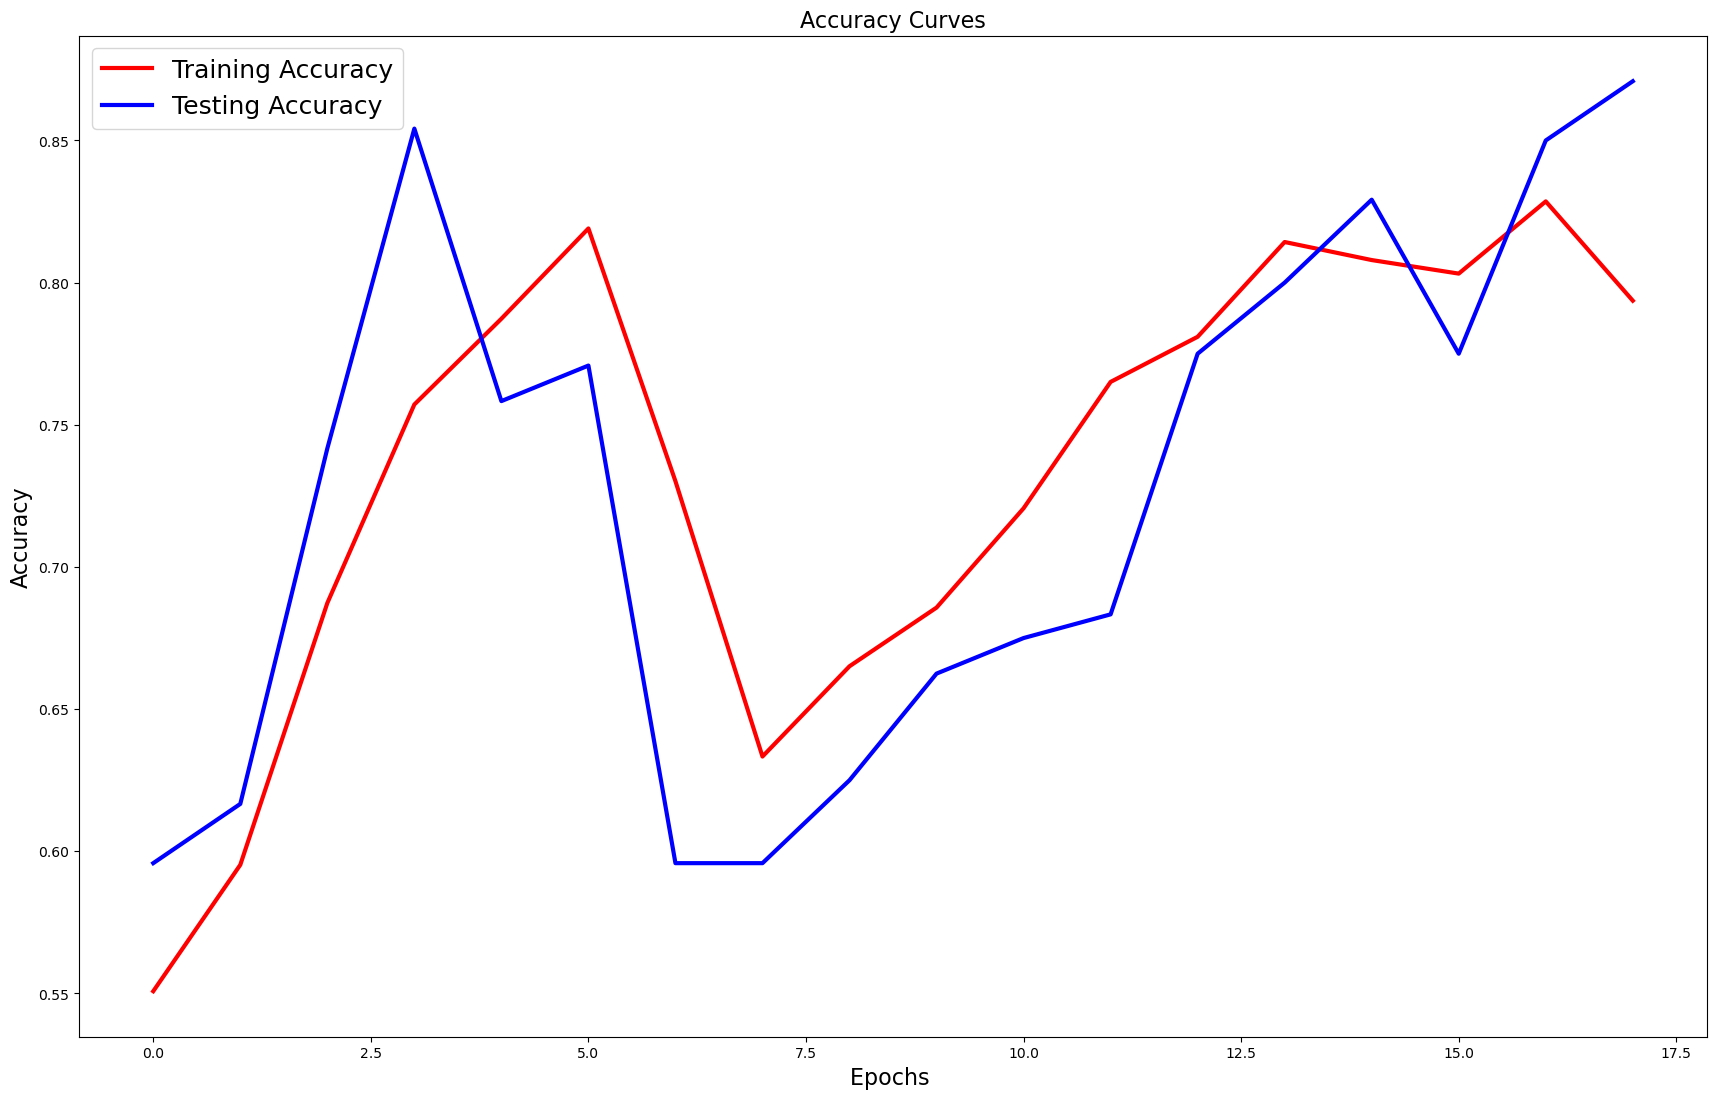

In [8]:
# Plot the model Accuracy graph (Ideally, it should be Logarithmic shape)
plt.plot(history.history['accuracy'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

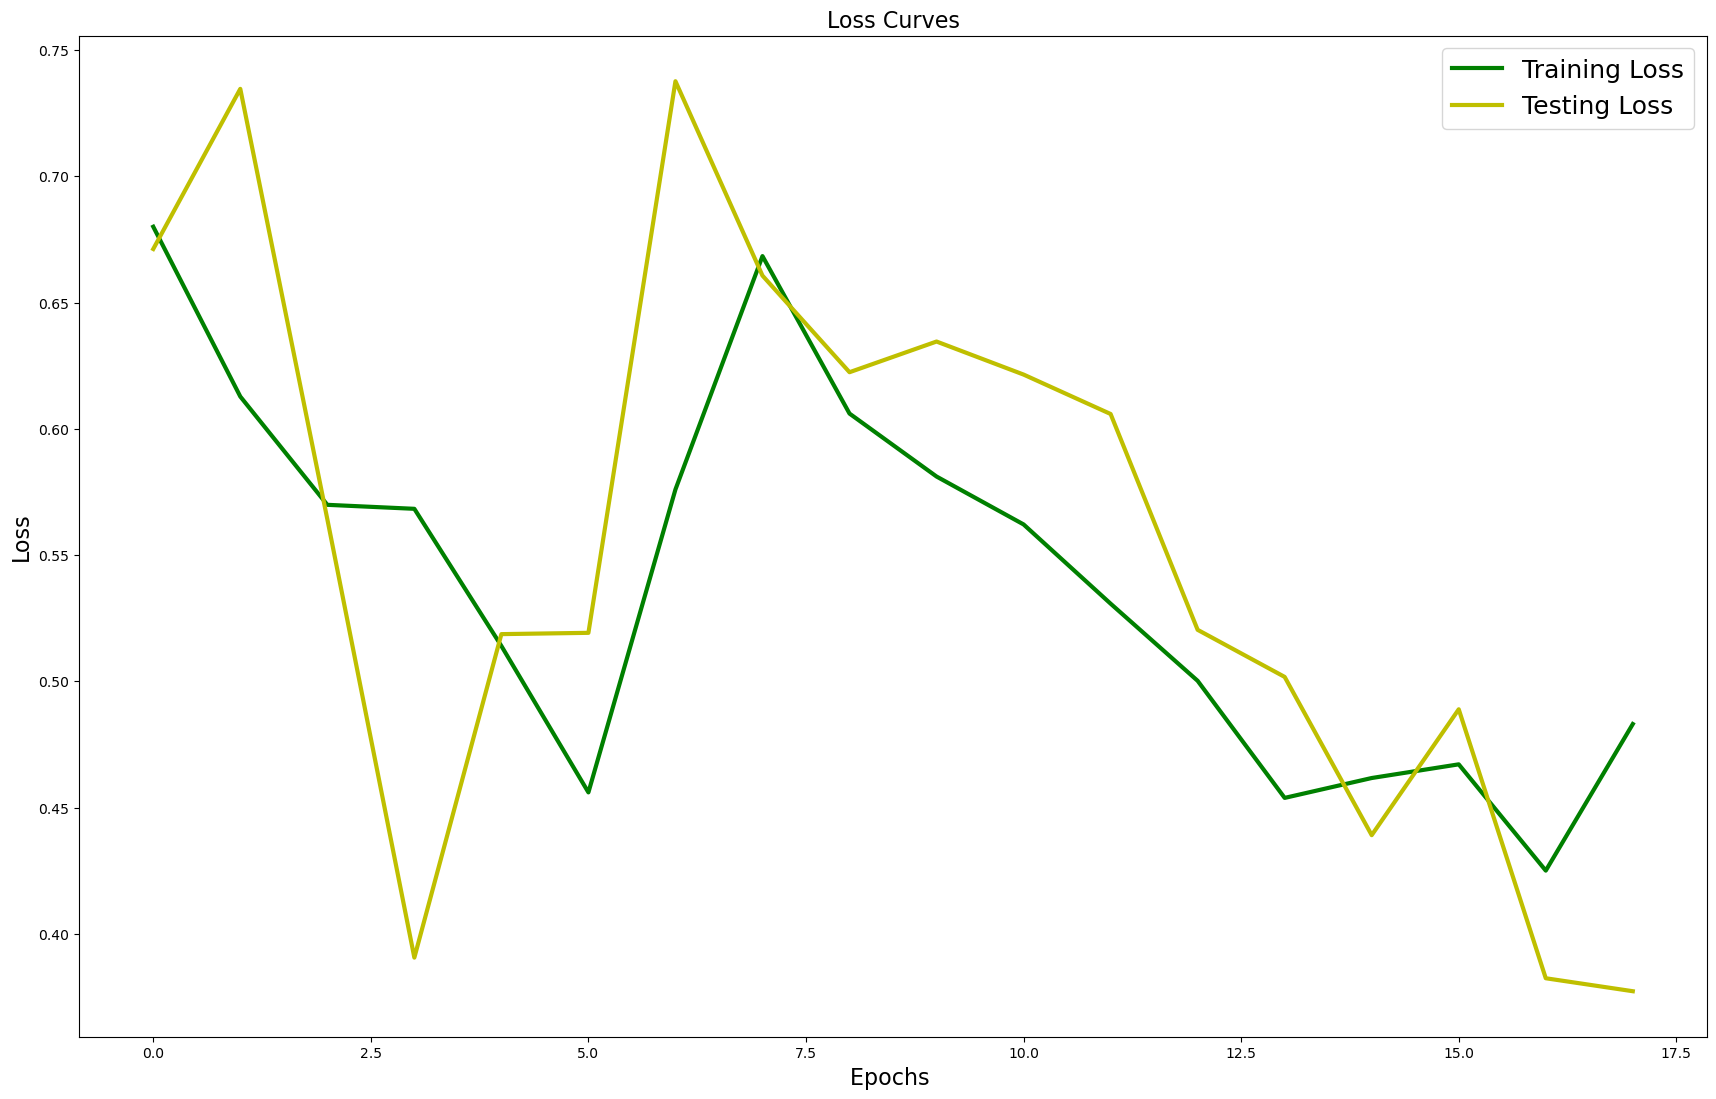

In [9]:
# Plot the model Loss graph (Ideally it should be Exponentially decreasing shape)
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)